# Import the dependancies

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load the Data and Understand Its Structure

#### 1. **Load the data:**

In [2]:
df = pd.read_csv("DS_Job_Change_Data.csv")


#### 2. **Inspect the first few rows**:

In [3]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [4]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (19158, 14)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
print(df.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


---

# Step 2: Univariate Analysis

#### 2.1 Numerical Variables

- **Histograms**

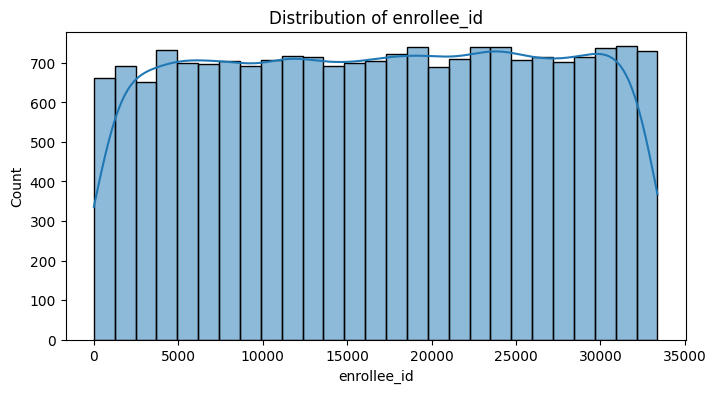

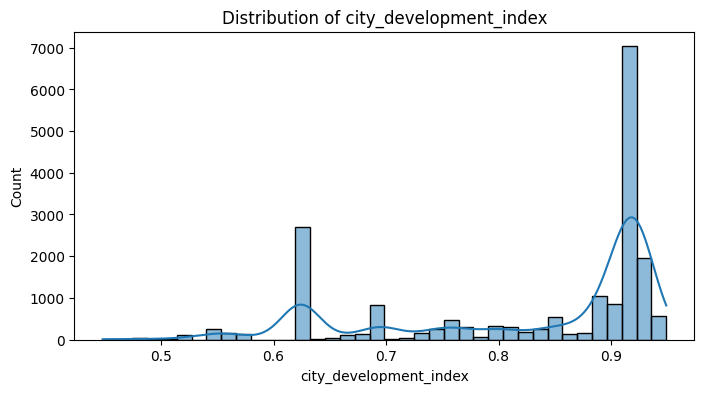

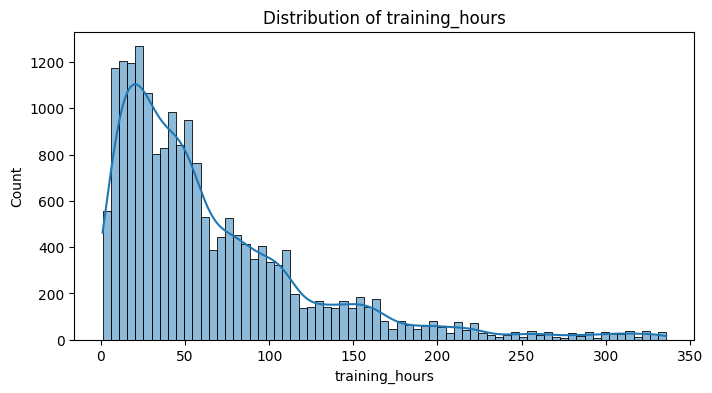

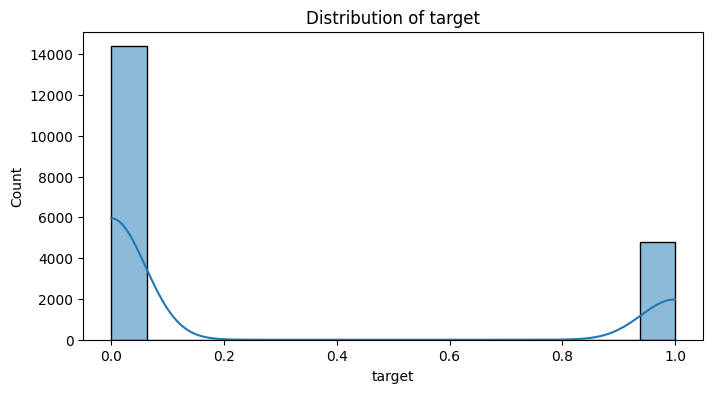

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

- **Boxplots** (to detect outliers):

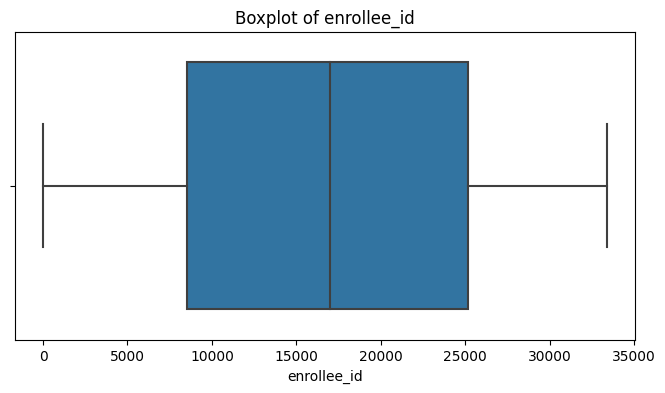

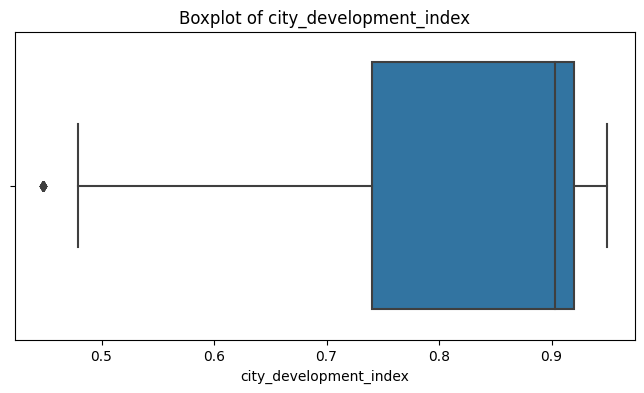

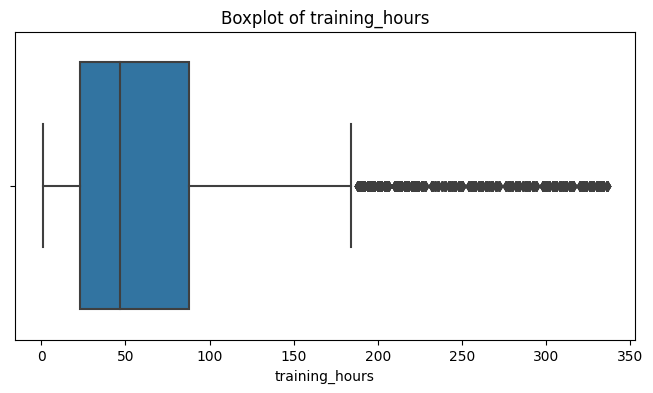

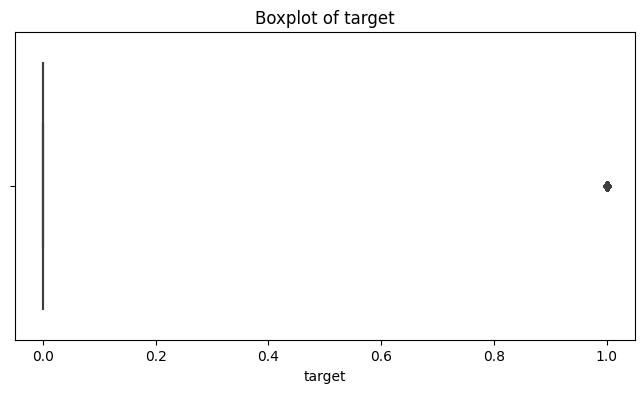

In [8]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#### **2.2 Categorical Variables**

- **Bar plots:**

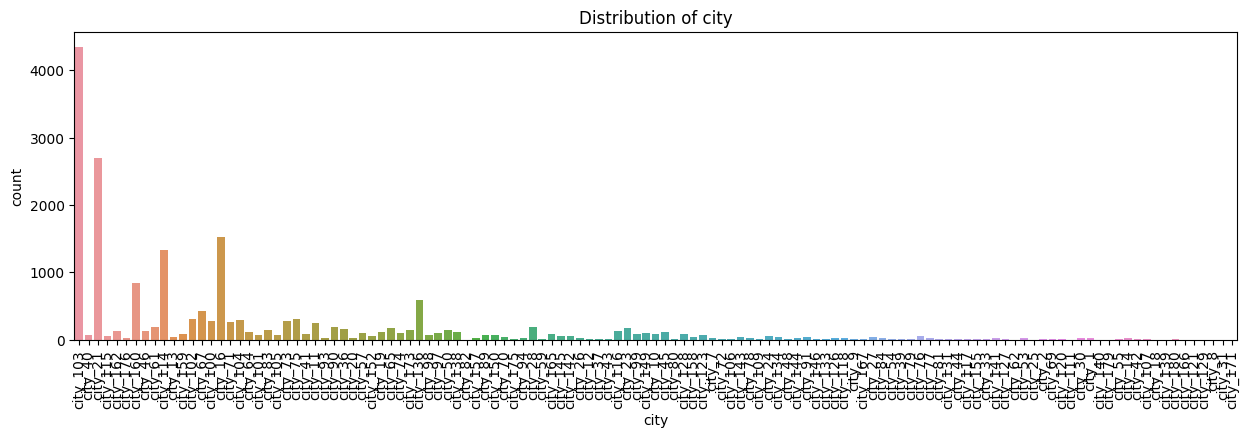

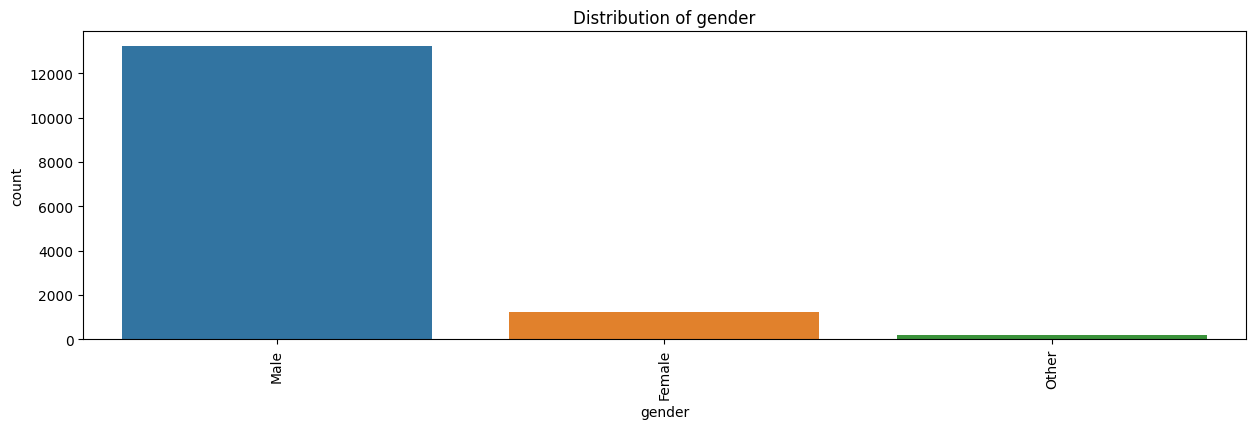

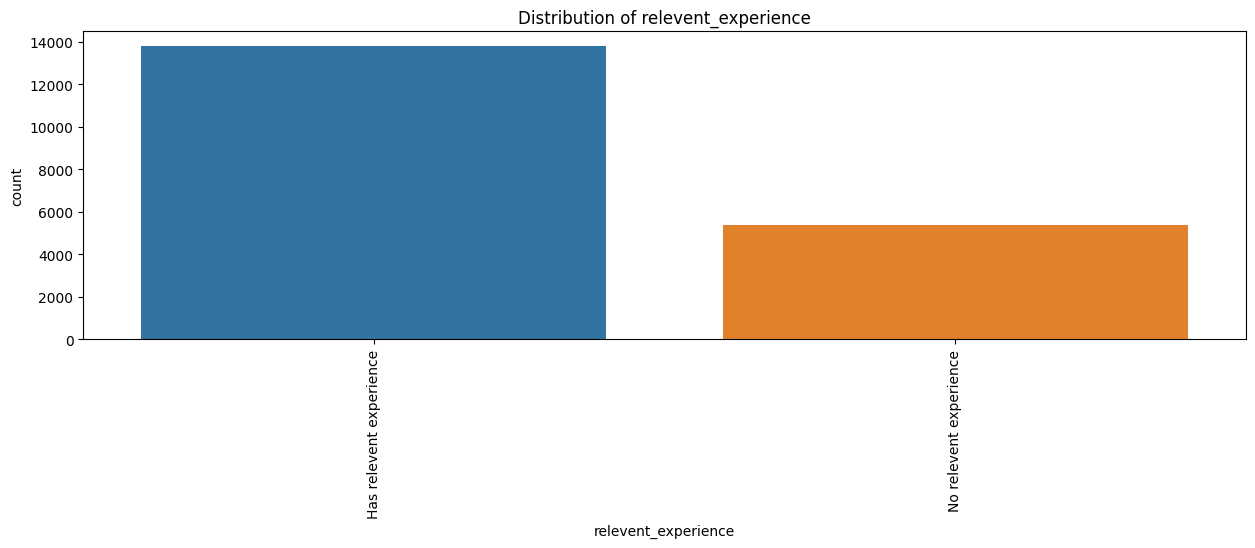

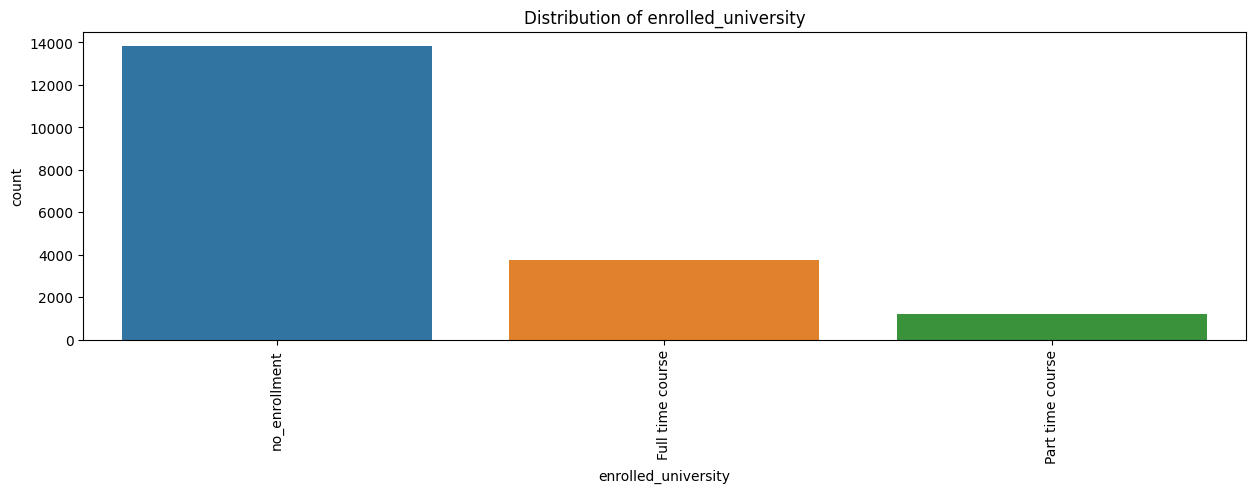

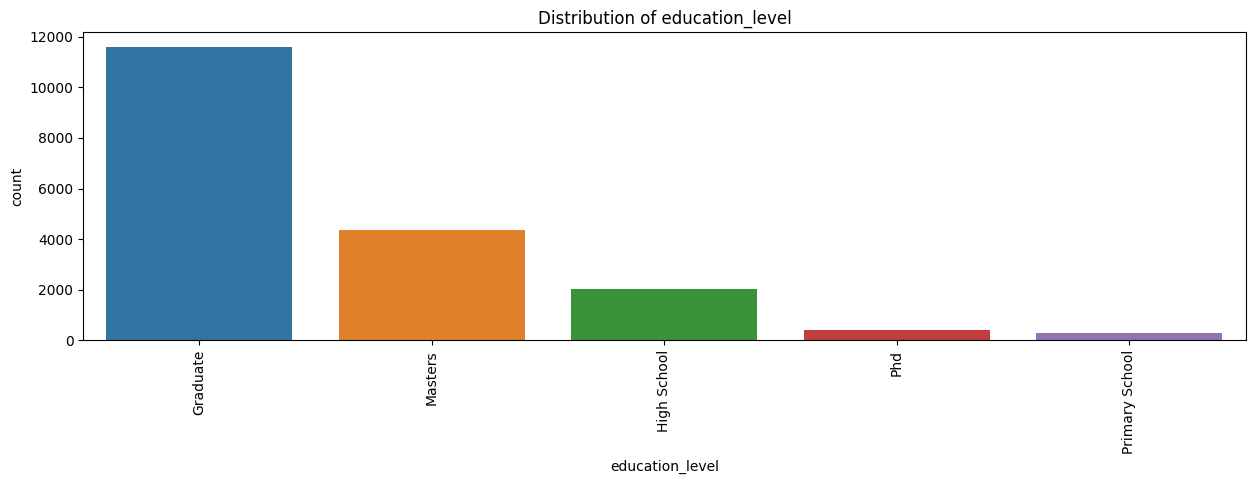

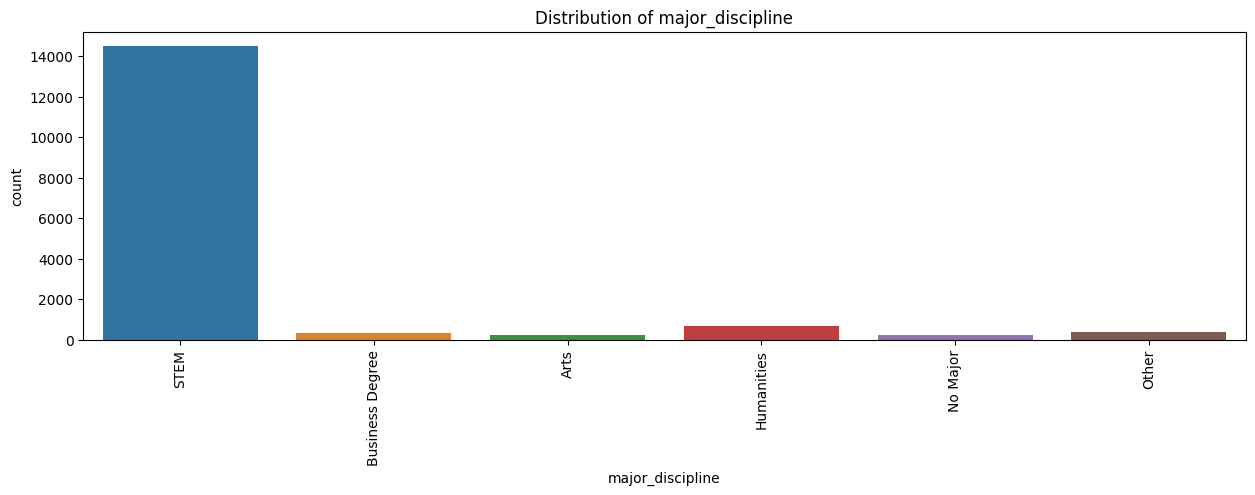

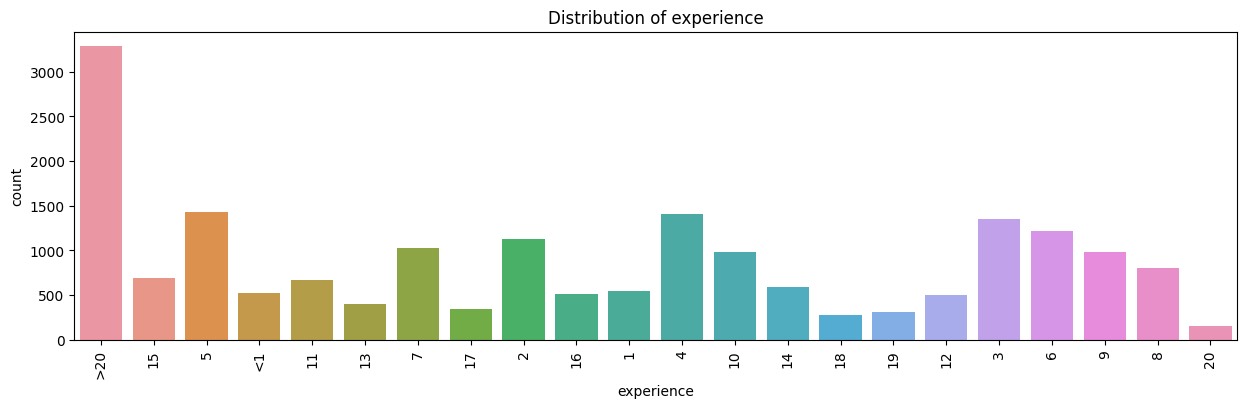

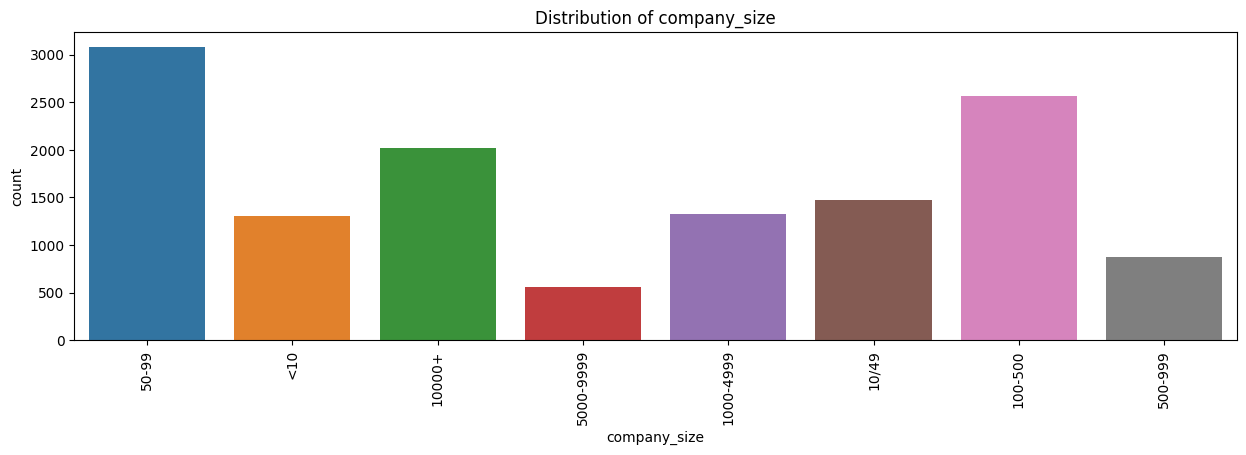

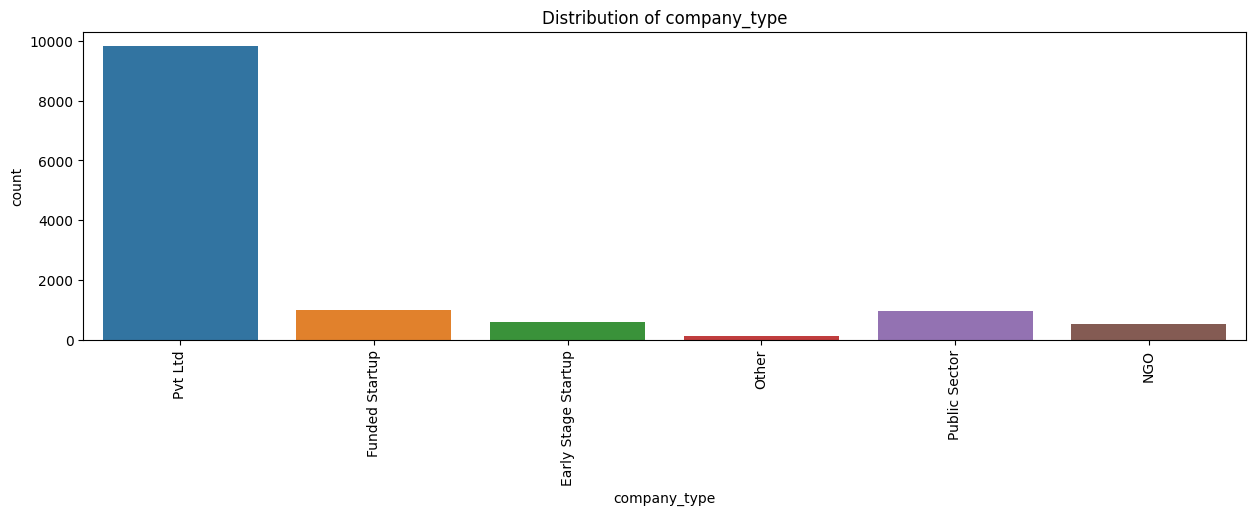

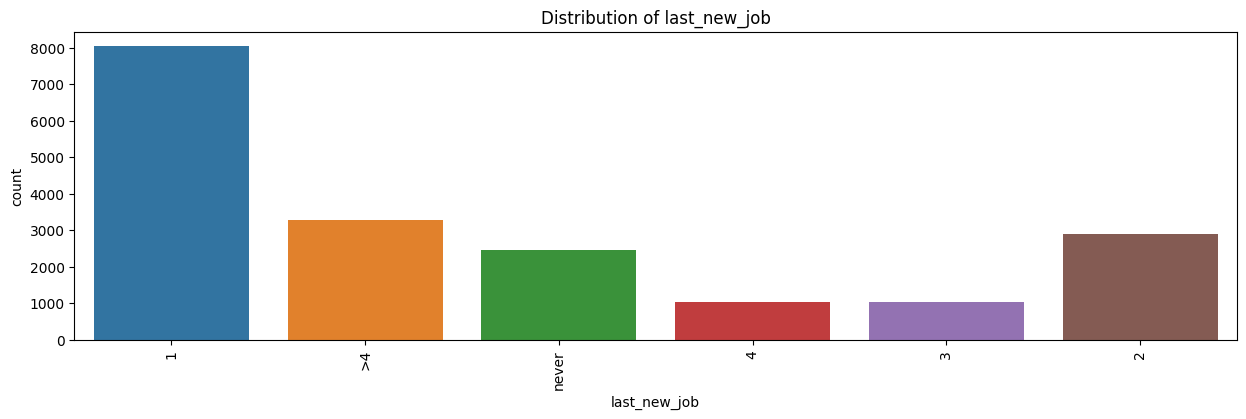

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(15, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

- **Value counts**

In [12]:
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())

Value counts for city:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
Value counts for gender:
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
Value counts for relevent_experience:
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
Value counts for enrolled_university:
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
Value counts for education_level:
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
Value counts for major_discipline:
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No

---

# Step 3: Bivariate Analysis

#### **3.1 Numerical vs. Target Variable**

- **Boxplots:**

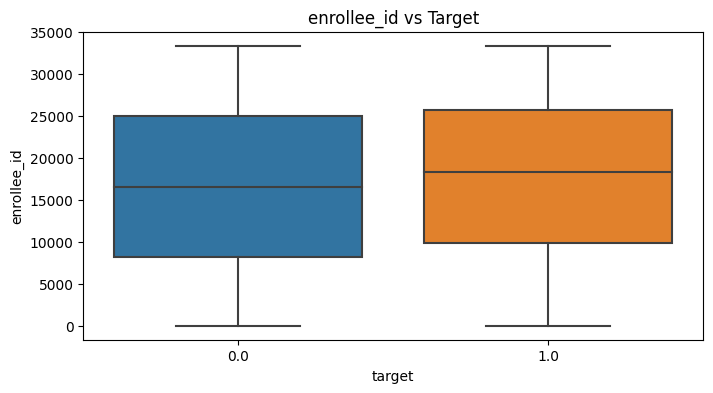

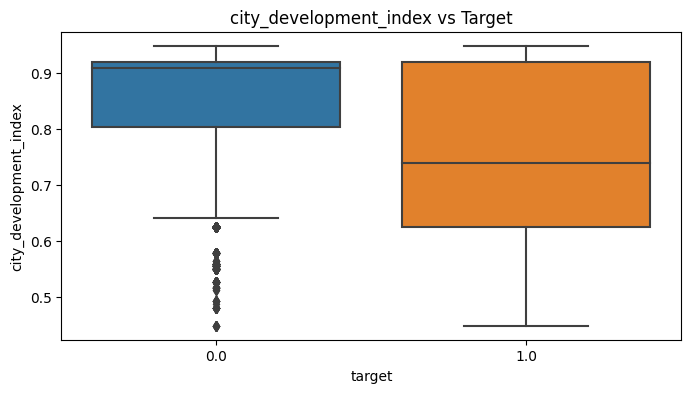

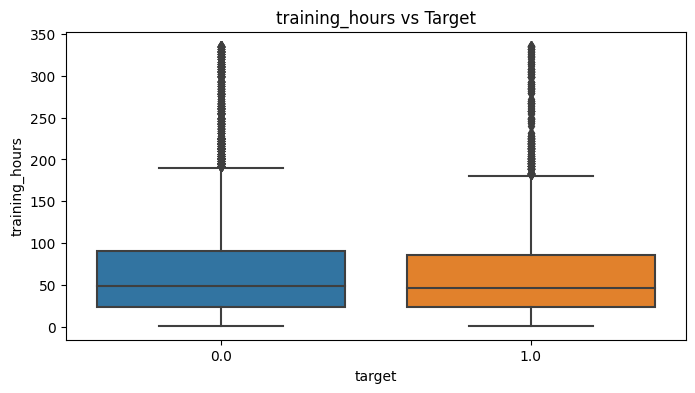

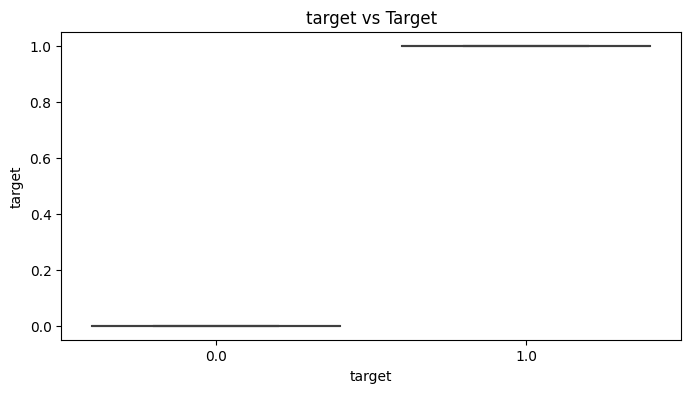

In [13]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df['target'], y=df[col])
    plt.title(f'{col} vs Target')
    plt.show()

---

- **Correlation heatmap**

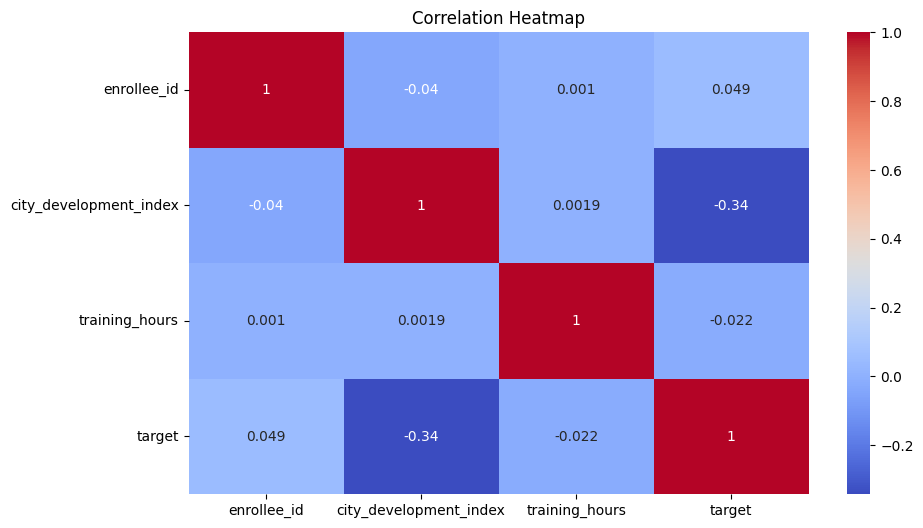

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

---

#### **3.2 Categorical vs. Target Variable**

- **Grouped bar plots:**

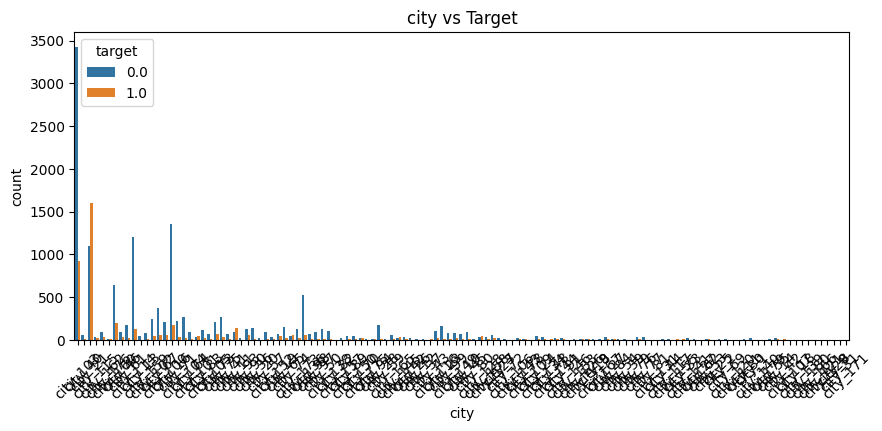

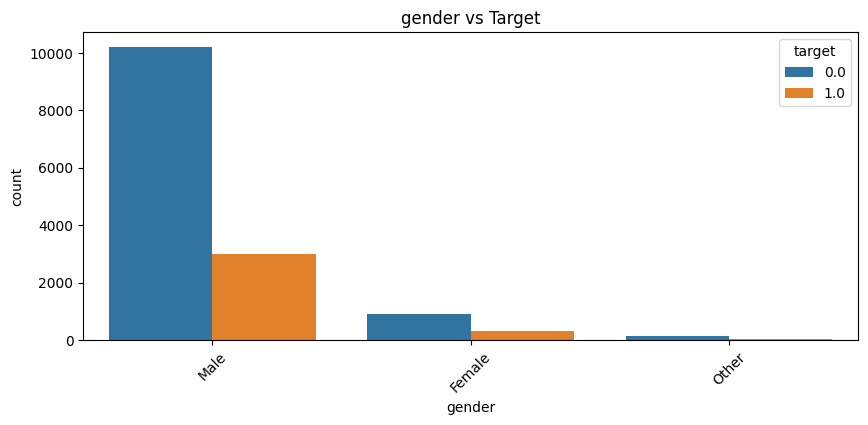

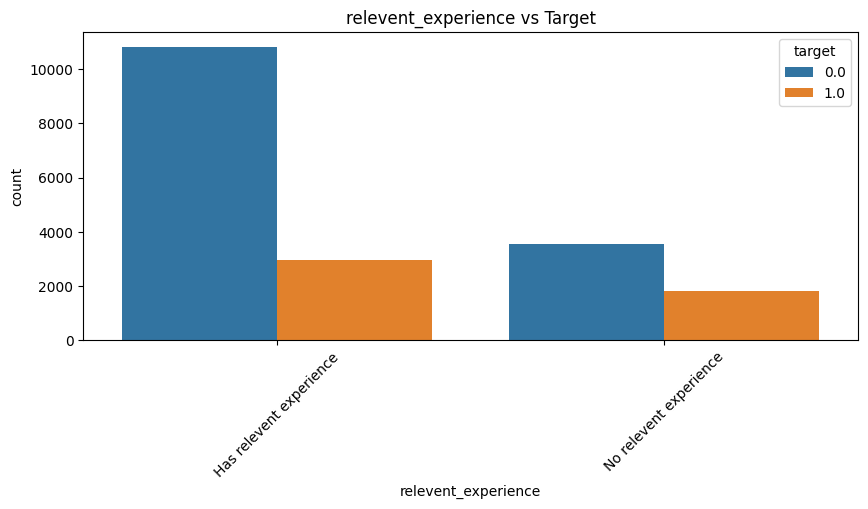

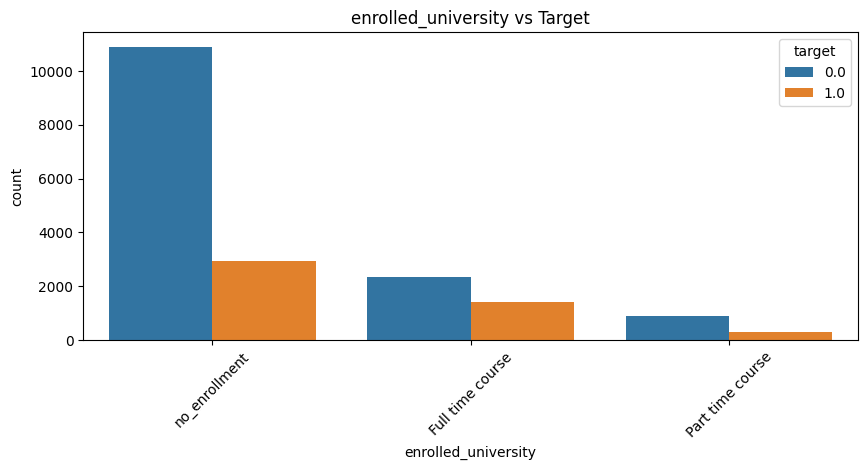

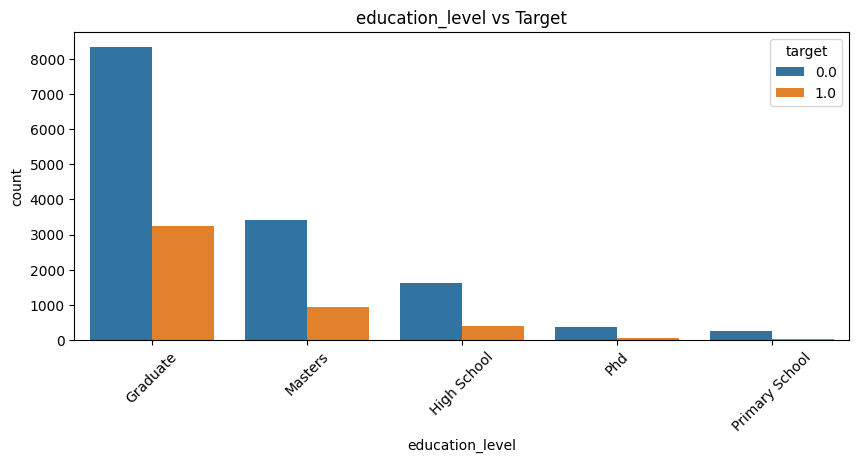

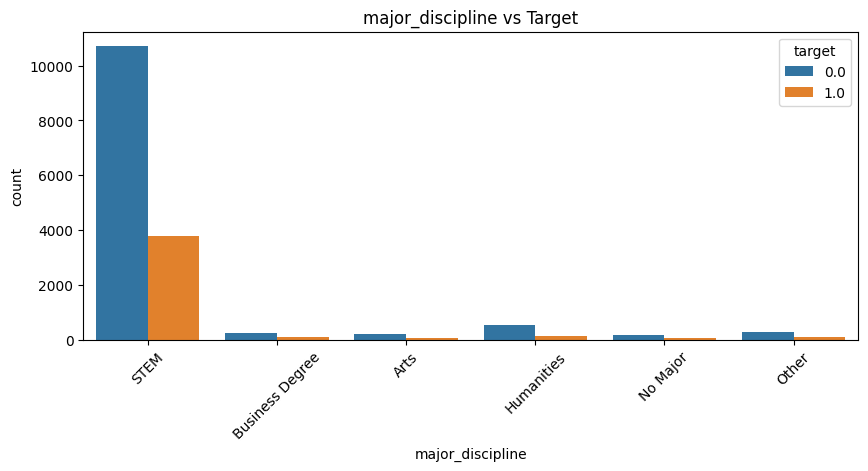

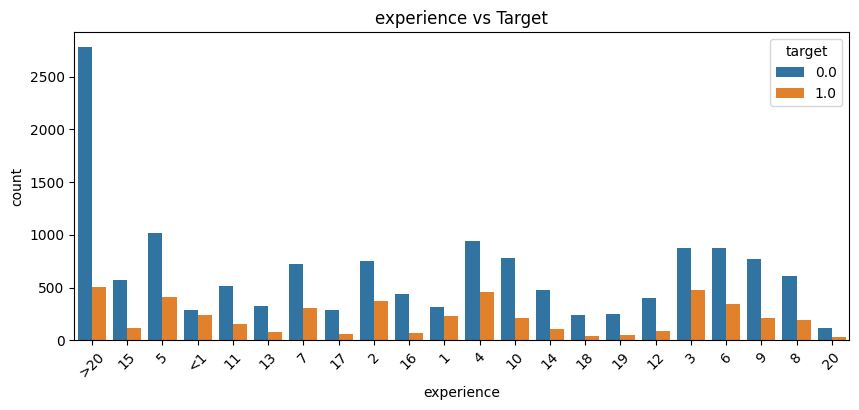

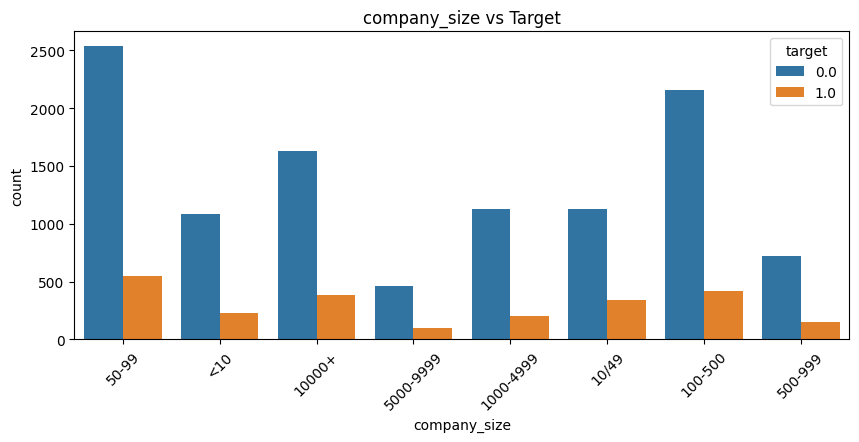

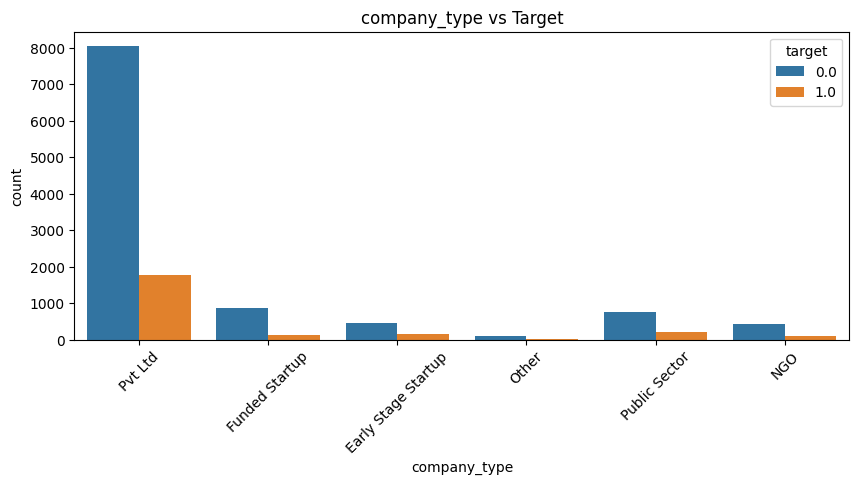

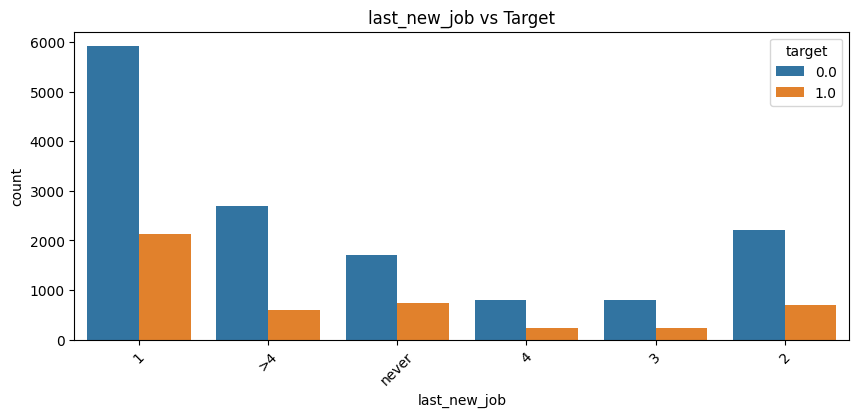

In [15]:
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue='target')
    plt.title(f'{col} vs Target')
    plt.xticks(rotation=45)
    plt.show()

- **Cross-tabulation:**

In [16]:
for col in categorical_columns:
    print(pd.crosstab(df[col], df['target'], normalize='index'))

target         0.0       1.0
city                        
city_1    0.884615  0.115385
city_10   0.895349  0.104651
city_100  0.763636  0.236364
city_101  0.426667  0.573333
city_102  0.828947  0.171053
...            ...       ...
city_93   0.807692  0.192308
city_94   0.615385  0.384615
city_97   0.923077  0.076923
city_98   0.898734  0.101266
city_99   0.840426  0.159574

[123 rows x 2 columns]
target       0.0       1.0
gender                    
Female  0.736672  0.263328
Male    0.772181  0.227819
Other   0.738220  0.261780
target                        0.0       1.0
relevent_experience                        
Has relevent experience  0.785310  0.214690
No relevent experience   0.661573  0.338427
target                    0.0       1.0
enrolled_university                    
Full time course     0.619111  0.380889
Part time course     0.747913  0.252087
no_enrollment        0.788594  0.211406
target                0.0       1.0
education_level                    
Graduate        

---

# Step 4: Multivariate Analysis

---

# Step 5: Handle Missing Values

---

# Step 6: Feature Engineering

---

# Step 7: Save the Cleaned Dataset

---